# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Alfan345/proyek-modelling-kesejahteraan-pekerja/refs/heads/main/data_klasifikasi_kesejahteraan.csv')
df.head()
df

,upah,gk,ump,peng,avg_upah_per_bulan,tahun,provinsi,kategori_dbs
0,11226,293697.0,1900000.0,395136.0,1975776,2015,ACEH,Menengah
1,11226,293697.0,1900000.0,260183.0,1975776,2015,ACEH,Menengah
2,11226,293697.0,1900000.0,655319.0,1975776,2015,ACEH,Menengah
3,11226,293697.0,1900000.0,466355.0,1975776,2015,ACEH,Menengah
4,11226,293697.0,1900000.0,529945.0,1975776,2015,ACEH,Menengah
...,...,...,...,...,...,...,...,...
21114,17542,521494.0,2729463.0,662025.0,3087392,2022,INDONESIA,Tinggi
21115,17542,513170.0,2729463.0,665756.0,3087392,2022,INDONESIA,Tinggi
21116,17542,513170.0,2729463.0,662025.0,3087392,2022,INDONESIA,Tinggi
21117,17542,505468.0,2729463.0,665756.0,3087392,2022,INDONESIA,Tinggi


In [14]:
le = LabelEncoder()

# Pastikan encoding diterapkan dengan benar
df["provinsi"] = le.fit_transform(df["provinsi"])
df["kategori_dbs"] = le.fit_transform(df["kategori_dbs"])

print(df.dtypes)  # Pastikan tidak ada yang object
print(df.head())  # Lihat apakah "provinsi" sudah berupa angka

upah                    int64
gk                    float64
ump                   float64
peng                  float64
avg_upah_per_bulan      int64
tahun                   int64
provinsi                int64
kategori_dbs            int64
dtype: object
    upah        gk        ump      peng  avg_upah_per_bulan  tahun  provinsi  \
0  11226  293697.0  1900000.0  395136.0             1975776   2015         0   
1  11226  293697.0  1900000.0  260183.0             1975776   2015         0   
2  11226  293697.0  1900000.0  655319.0             1975776   2015         0   
3  11226  293697.0  1900000.0  466355.0             1975776   2015         0   
4  11226  293697.0  1900000.0  529945.0             1975776   2015         0   

   kategori_dbs  
0             0  
1             0  
2             0  
3             0  
4             0  


In [15]:
print(df.dtypes)


upah                    int64
gk                    float64
ump                   float64
peng                  float64
avg_upah_per_bulan      int64
tahun                   int64
provinsi                int64
kategori_dbs            int64
dtype: object


In [16]:
df["provinsi"] = df["provinsi"].astype(int)  # atau astype(float) jika perlu
df["kategori_dbs"] = df["kategori_dbs"].astype(int)


In [17]:
print(df["provinsi"].dtype)  # Harusnya int, bukan object (string)
print(df["provinsi"].unique())  # Lihat apakah sudah berubah jadi angka


int64
[ 0 34 32 26  8 33  3 19 17 18  5  9 10  4 11  2  1 22 23 12 14 13 15 16
 31 29 28 30  6 27 20 21 25 24  7]


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [18]:
# Tentukan kolom fitur dan target
fitur = ['upah', 'gk', 'ump', 'peng', 'avg_upah_per_bulan', 'tahun', 'provinsi']
target = 'kategori_dbs'

X = df[fitur]
y = df[target]

# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [19]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),  # Macro untuk multi-kelas
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

# Mengevaluasi setiap model
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)


                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.997869   0.995023  0.999002  0.997001
1            Decision Tree (DT)  0.998343   0.998406  0.997008  0.997705
2            Random Forest (RF)  0.998816   0.998162  0.998627  0.998394
3  Support Vector Machine (SVM)  0.888258   0.860863  0.818312  0.837574
4              Naive Bayes (NB)  0.813920   0.729792  0.795690  0.755756


Model terbaik: Random Forest (99.88% accuracy) memiliki performa paling unggul, diikuti oleh Decision Tree (99.83%) dan KNN (99.79%).

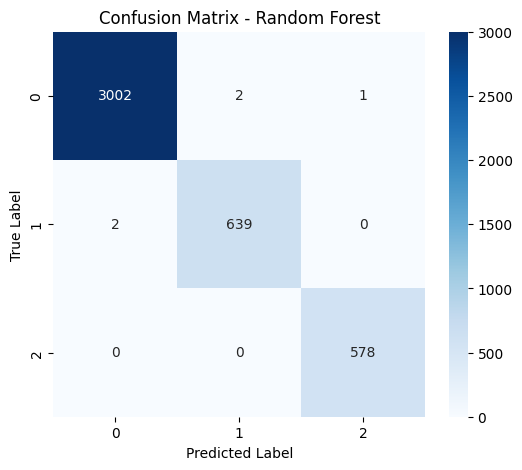

In [21]:
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [22]:


# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_tuned = RandomForestClassifier(random_state=42)

# Grid Search dengan Cross Validation (cv=5)
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [23]:
# Model Random Forest dengan parameter terbaik
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluasi model sebelum tuning
rf_results_before = evaluate_model(rf, X_test, y_test)

# Evaluasi model setelah tuning
rf_results_after = evaluate_model(rf_best, X_test, y_test)

# Bandingkan hasil sebelum dan sesudah tuning
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Before Tuning": [
        rf_results_before["Accuracy"],
        rf_results_before["Precision"],
        rf_results_before["Recall"],
        rf_results_before["F1-Score"]
    ],
    "After Tuning": [
        rf_results_after["Accuracy"],
        rf_results_after["Precision"],
        rf_results_after["Recall"],
        rf_results_after["F1-Score"]
    ]
})

# Tampilkan hasil perbandingan
print(comparison_df)


      Metric  Before Tuning  After Tuning
0   Accuracy       0.998816      0.998816
1  Precision       0.998162      0.998570
2     Recall       0.998627      0.998218
3   F1-Score       0.998394      0.998393


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Hyperparameter tuning tidak memberikan peningkatan signifikan karena model sudah sangat optimal sebelum tuning. Precision meningkat, tetapi Recall sedikit turun, menunjukkan bahwa model yang dituning sedikit lebih selektif.
2. Identifikasi kelemahan model, seperti:
  - Meskipun secara keseluruhan Precision meningkat, Recall sedikit menurun setelah tuning.
  - Hal ini menunjukkan bahwa model yang dituning mungkin lebih selektif dalam menentukan suatu kelas, sehingga bisa terjadi sedikit peningkatan False Negatives.
  - Kemungkinan overfitting cukup tinggi karena performa yang sangat baik di data uji. Jika model diuji pada data baru yang berbeda distribusinya, mungkin akurasinya bisa turun.
3. rekomendasi tindakan lanjutan :
  - perlu diuji dengan validasi silang atau data tambahan untuk memastikan tidak terjadinya overfitting.
  - perlu dilakukan analisis lebih lanjut menggunakan confusion matrix per kelas untuk mengetahui kelas mana yang bermasalah, yang mengakibatkan turun nya recall

